# Bank of England:
## Sentiment Analysis of Speech Data

## 1.0 Load and explore data

In [1]:
# Import required libraries
import pandas as pd
!pip install yfinance
import yfinance as yf

In [2]:
# Create function to validate dataframe.
def validate_dataframe(dataframe):
    # View data types.
    print("Data Types:")
    print(dataframe.dtypes)

    # View metadata.
    print("\nDataFrame Info:")
    print(dataframe.info())

    # Descriptive statistics.
    print("\nDescriptive Statistics:")
    print(dataframe.describe())

    # Check for missing values.
    missing_values = dataframe.isna().sum()
    if missing_values.sum() > 0:
        print("\nMissing Values:")
        print(missing_values)
    else:
        print("\nNo missing values found.")

    # Check for duplicates.
    num_duplicates = dataframe.duplicated().sum()
    if num_duplicates > 0:
        print("\nDuplicates:")
        print(f"Found {num_duplicates} duplicate rows.")
    else:
        print("\nNo duplicates found.")

    # View the DataFrame.
    print("\nDataFrame Preview:")
    return(dataframe)

In [3]:
# Create function to obtain stock market data.
def get_stock_market_data(ticker_symbol):
    # try and except added for error handling and debugging.
    try:
        # Create a Ticker object for the given ticker symbol.
        ticker = yf.Ticker(ticker_symbol)

        # Get historical data from inception to present.
        historical_data = ticker.history(period="max")

        return historical_data
    except Exception as e:
        return f"Error: {e}"

In [4]:
# Import the CSV file containing central bank speeches.
# The code assumes the csv file is in the working directory.
speeches = pd.read_csv('all_speeches.csv')

# Sense-check imported dataframe.
validate_dataframe(speeches)

Data Types:
reference    object
country      object
date         object
title        object
author       object
is_gov        int64
text         object
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB
None

Descriptive Statistics:
            is_gov
count  7721.000000
mean      0.347235
std       0.476122
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

No missing values found.

No duplicates found.

DataFrame Preview:


,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [5]:
# View dataframe
speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [19]:
# Rename country column.
speeches.rename(columns={'country': 'location'}, inplace=True)

# Identify anomalous dates (descending order).
speeches.sort_values(by='date', ascending=False, inplace=True)

# View the output.
speeches.head()

,reference,location,date,title,author,is_gov,text
4960,r221110a_SNB,EU,2022-11-10,Current challenges to central banks' independence,jordan,1,Ladies and gentlemen I am very grateful for th...
3254,r221104a_ECB,EU,2022-11-04,Monetary policy in a high inflation environmen...,lagarde,1,"Inflation in the euro area is far too high, re..."
3253,r221104b_ECB,EU,2022-11-04,The euro area economy and the energy transition,guindos,0,I am very pleased to be taking part in this ev...
3252,r221103a_ECB,EU,2022-11-03,Mind the step: calibrating monetary policy in ...,panetta,0,The euro area is facing a sequence of unpreced...
903,r221102a_BOC,CAN,2022-11-02,Preparing for payments supervision,morrow,0,"Good morning, and thank you for inviting me to..."


In [20]:
# Identify anomalous dates (ascending order).
#speeches.sort_values(by='date', ascending=True, inplace=True)

# View the output.
#speeches.head()

In [21]:
# Update the 'date' column for the found row using .loc.
speeches.loc[4010, 'date'] = '2000-10-02'

# Display the updated DataFrame
speeches.head()

,reference,location,date,title,author,is_gov,text
4960,r221110a_SNB,EU,2022-11-10,Current challenges to central banks' independence,jordan,1,Ladies and gentlemen I am very grateful for th...
3254,r221104a_ECB,EU,2022-11-04,Monetary policy in a high inflation environmen...,lagarde,1,"Inflation in the euro area is far too high, re..."
3253,r221104b_ECB,EU,2022-11-04,The euro area economy and the energy transition,guindos,0,I am very pleased to be taking part in this ev...
3252,r221103a_ECB,EU,2022-11-03,Mind the step: calibrating monetary policy in ...,panetta,0,The euro area is facing a sequence of unpreced...
903,r221102a_BOC,CAN,2022-11-02,Preparing for payments supervision,morrow,0,"Good morning, and thank you for inviting me to..."


In [22]:
# Check the number of locations.
speeches['location'].value_counts()

EU     3302
US     1551
UK     1209
JPN     755
CAN     620
AUS     284
Name: location, dtype: int64

In [23]:
# Group 'sweden' and 'switzerland' under 'Euro Area'
speeches['location'] = speeches['location'].apply(lambda x: 'euro area' if x in ['sweden', 'switzerland'] else x)

# Check the number of locations following grouping.
speeches['location'].value_counts()

EU     3302
US     1551
UK     1209
JPN     755
CAN     620
AUS     284
Name: location, dtype: int64

In [24]:
# Rename the different values/locations.
new_locations = {'euro area': 'EU', 'united states': 'US', 'united kingdom': 'UK',
                 'japan': 'JPN', 'canada': 'CAN', 'australia': 'AUS'}

# Apply new location values to dataset.
speeches['location'] = speeches['location'].replace(new_locations)

# Verify locations in dataset.
speeches['location'].value_counts()

EU     3302
US     1551
UK     1209
JPN     755
CAN     620
AUS     284
Name: location, dtype: int64

In [25]:
# Display the first few rows to ensure it's loaded correctly
speeches.head()

,reference,location,date,title,author,is_gov,text
4960,r221110a_SNB,EU,2022-11-10,Current challenges to central banks' independence,jordan,1,Ladies and gentlemen I am very grateful for th...
3254,r221104a_ECB,EU,2022-11-04,Monetary policy in a high inflation environmen...,lagarde,1,"Inflation in the euro area is far too high, re..."
3253,r221104b_ECB,EU,2022-11-04,The euro area economy and the energy transition,guindos,0,I am very pleased to be taking part in this ev...
3252,r221103a_ECB,EU,2022-11-03,Mind the step: calibrating monetary policy in ...,panetta,0,The euro area is facing a sequence of unpreced...
903,r221102a_BOC,CAN,2022-11-02,Preparing for payments supervision,morrow,0,"Good morning, and thank you for inviting me to..."


In [26]:
# Look for number of null values
speeches.isnull().sum()

reference    0
location     0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64

In [27]:
# Check the number of rows before dropping duplicates
rows_before = len(speeches)

In [28]:
# Attempt to drop duplicates
speeches.drop_duplicates(inplace=True)

In [29]:
# Check the number of rows after dropping duplicates
rows_after = len(speeches)

In [30]:
# Print the difference
print(f"Number of duplicate rows removed: {rows_before - rows_after}")

Number of duplicate rows removed: 0


In [31]:
# View datatypes
print("speeches datatype:")
print(speeches.dtypes)

# View shape
print("speeches shape:")
print(speeches.shape)

speeches datatype:
reference    object
location     object
date         object
title        object
author       object
is_gov        int64
text         object
dtype: object
speeches shape:
(7721, 7)


## 2.0 Prepare data for NLP

In [32]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import wordcloud
import textblob

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### 2a. Change to lower case and join the elements in each of the columns respectively

In [33]:
# By converting all text to a consistent case (lower) we can ensure uniformity and token recognition, both of which are crucial for preprocessing for text analysis and NLP.
speeches['title'] = speeches['title'].str.lower()
speeches['text'] = speeches['text'].str.lower()

In [34]:
# Chack changes
speeches.head()

,reference,location,date,title,author,is_gov,text
4960,r221110a_SNB,EU,2022-11-10,current challenges to central banks' independence,jordan,1,ladies and gentlemen i am very grateful for th...
3254,r221104a_ECB,EU,2022-11-04,monetary policy in a high inflation environmen...,lagarde,1,"inflation in the euro area is far too high, re..."
3253,r221104b_ECB,EU,2022-11-04,the euro area economy and the energy transition,guindos,0,i am very pleased to be taking part in this ev...
3252,r221103a_ECB,EU,2022-11-03,mind the step: calibrating monetary policy in ...,panetta,0,the euro area is facing a sequence of unpreced...
903,r221102a_BOC,CAN,2022-11-02,preparing for payments supervision,morrow,0,"good morning, and thank you for inviting me to..."


### 2b. Replace punctuation in each of the columns respectively

In [35]:
import re

In [36]:
# Replace all the punctuations in text column.
speeches['text'] = [re.sub('[^\w\s]+', '', s) for s in speeches['text'].tolist()]

# View output.
speeches['text']

4960    ladies and gentlemen i am very grateful for th...
3254    inflation in the euro area is far too high rea...
3253    i am very pleased to be taking part in this ev...
3252    the euro area is facing a sequence of unpreced...
903     good morning and thank you for inviting me to ...
                              ...                        
4       as a longtime fan of don sanders i am delighte...
3       it is a pleasure to have this opportunity to a...
2       i welcome this opportunity to talk about prosp...
1       today i wish to talk about real interest rates...
0       they would no doubt argue that to have two obj...
Name: text, Length: 7721, dtype: object

### 3. Tokenise and create worldclouds

In [37]:
# Create new DataFrame (copy DataFrame).
speeches_text = speeches[['text']]

# View DataFrame.
speeches_text

,text
4960,ladies and gentlemen i am very grateful for th...
3254,inflation in the euro area is far too high rea...
3253,i am very pleased to be taking part in this ev...
3252,the euro area is facing a sequence of unpreced...
903,good morning and thank you for inviting me to ...
...,...
4,as a longtime fan of don sanders i am delighte...
3,it is a pleasure to have this opportunity to a...
2,i welcome this opportunity to talk about prosp...
1,today i wish to talk about real interest rates...


In [38]:
# Apply tokenisation to column.
speeches_text['text_tokens'] = speeches_text['text'].apply(word_tokenize)

# View DataFrame
speeches_text.head()

,text,text_tokens
4960,ladies and gentlemen i am very grateful for th...,"[ladies, and, gentlemen, i, am, very, grateful..."
3254,inflation in the euro area is far too high rea...,"[inflation, in, the, euro, area, is, far, too,..."
3253,i am very pleased to be taking part in this ev...,"[i, am, very, pleased, to, be, taking, part, i..."
3252,the euro area is facing a sequence of unpreced...,"[the, euro, area, is, facing, a, sequence, of,..."
903,good morning and thank you for inviting me to ...,"[good, morning, and, thank, you, for, inviting..."


In [39]:
# Review: Create a word cloud.
wordcloud_text = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_text.generate(' '.join(speeches_text['text_tokens'].apply(' '.join)))

(-0.5, 1599.5, 899.5, -0.5)

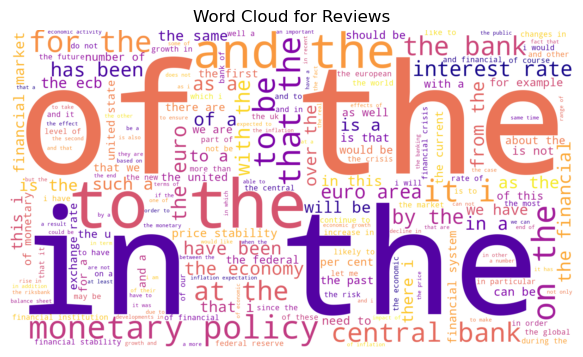

In [40]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title('Word Cloud for Reviews')
plt.axis('off')

## 4. Frequency distribution and polarity

### 4a. Create frequency distribution

In [41]:
# View first 5 rows of the dataframe
speeches_text.head()

,text,text_tokens
4960,ladies and gentlemen i am very grateful for th...,"[ladies, and, gentlemen, i, am, very, grateful..."
3254,inflation in the euro area is far too high rea...,"[inflation, in, the, euro, area, is, far, too,..."
3253,i am very pleased to be taking part in this ev...,"[i, am, very, pleased, to, be, taking, part, i..."
3252,the euro area is facing a sequence of unpreced...,"[the, euro, area, is, facing, a, sequence, of,..."
903,good morning and thank you for inviting me to ...,"[good, morning, and, thank, you, for, inviting..."


In [42]:
# Import the FreqDist class
from nltk.probability import FreqDist

In [43]:
# Combine all tokens into a single text
speeches_text['text'] = speeches_text['text_tokens'].apply(' '.join)

In [44]:
# Create frequency distribution for the 'text' column
all_text_tokens = [token for tokens in speeches_text['text_tokens'] for token in tokens]
freq_dist_text = FreqDist(all_text_tokens)

# View frequency distribution for 'text'
print("Frequency Distribution for 'text' column:")
print(freq_dist_text)

Frequency Distribution for 'text' column:
<FreqDist with 94376 samples and 23951413 outcomes>


In [45]:
# Display the 15 most common words in text column
most_common_text = freq_dist_text.most_common(15)

print("15 Most Common Words in 'text':")
for word, freq in most_common_text:
    print(f'{word}: {freq}')

15 Most Common Words in 'text':
the: 1738306
of: 865975
to: 753435
in: 664417
and: 651488
a: 437622
that: 339566
is: 318717
for: 247762
as: 194547
on: 178108
be: 172547
this: 170524
have: 158688
are: 154962


### 4b. Remove alphanumeric characters

In [46]:
# Delete all the alpha-numeric characters
all_text_tokens = [word for word in all_text_tokens if word.isalnum()]

### 4c. Remove stopwords

In [47]:
# Create a set of stopwords
stop_words = set(stopwords.words('english'))

In [48]:
# Remove stopword in text
text_stopwords = [word for word in all_text_tokens if word.lower() not in stop_words]

# Recalculate frequency after removing stopwords
freq_dist_text2 = FreqDist(text_stopwords)

# View frequecy 
freq_dist_text2

FreqDist({'financial': 121567, 'policy': 111663, 'inflation': 86990, 'monetary': 84842, 'banks': 78885, 'bank': 68843, 'rate': 68803, 'market': 68236, 'also': 66403, 'would': 65665, ...})

### 4d. Create wordclouds without stopwords

In [49]:
# Create a wordcloud without stop words.
# Review: Create a word cloud.
wordcloud_text = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_text.generate(" ".join(text_stopwords))

(-0.5, 1599.5, 899.5, -0.5)

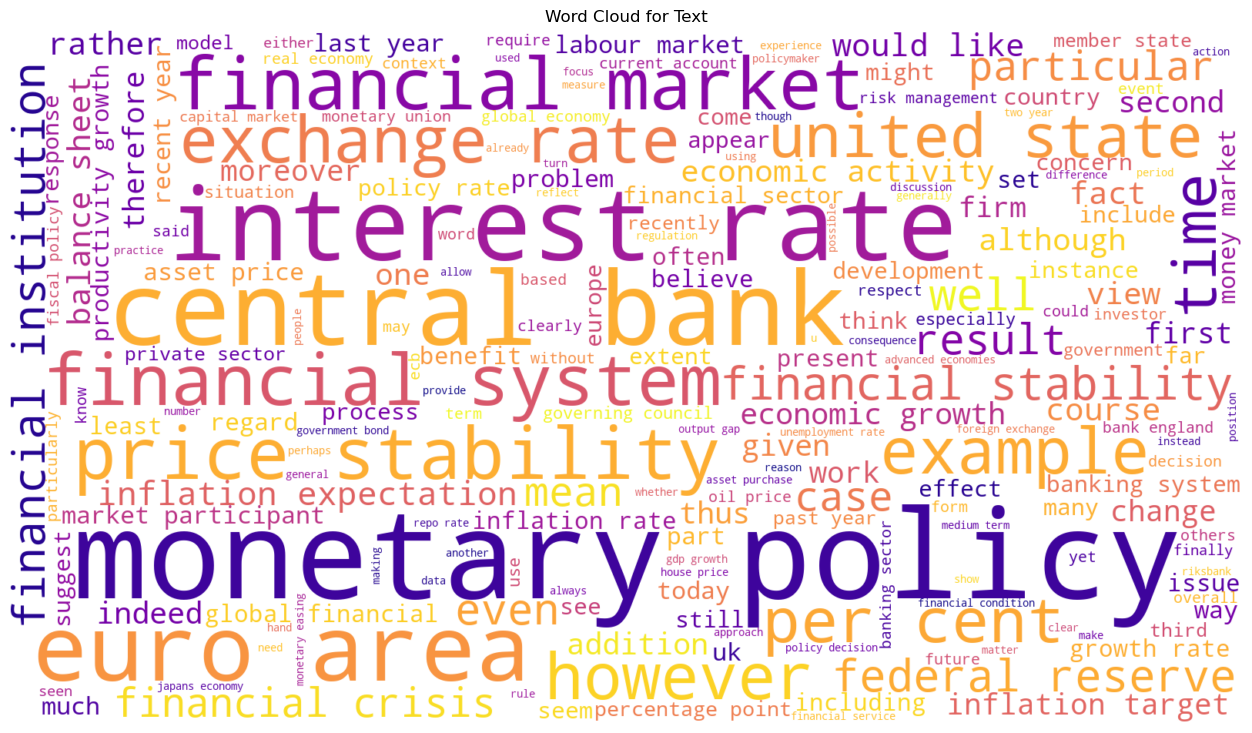

In [50]:
# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title('Word Cloud for Text')
plt.axis('off')

### 4e. Identify 15 most commom words and polarity

In [51]:
# Determine the 15 most common words.
most_common_text = freq_dist_text2.most_common(15)

print("15 Most Common Words in 'text':")
for word, freq in most_common_text:
    print(f'{word}: {freq}')

15 Most Common Words in 'text':
financial: 121567
policy: 111663
inflation: 86990
monetary: 84842
banks: 78885
bank: 68843
rate: 68803
market: 68236
also: 66403
would: 65665
economic: 63806
growth: 63404
economy: 60510
central: 47772
rates: 47449


In [52]:
# Calculate sentiment polarity for the 15 most common words in 'text'
for word, _ in most_common_text:
    blob = TextBlob(word)
    word_polarity = blob.sentiment.polarity
    print(f'{word}: Polarity = {word_polarity}')

financial: Polarity = 0.0
policy: Polarity = 0.0
inflation: Polarity = 0.0
monetary: Polarity = 0.0
banks: Polarity = 0.0
bank: Polarity = 0.0
rate: Polarity = 0.0
market: Polarity = 0.0
also: Polarity = 0.0
would: Polarity = 0.0
economic: Polarity = 0.2
growth: Polarity = 0.0
economy: Polarity = 0.0
central: Polarity = 0.0
rates: Polarity = 0.0


## 5. Review polarity and sentiment
 Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [53]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [54]:
# Determine polarity text columns. 
speeches_text['text_polarity'] = speeches_text['text'].apply(generate_polarity)

# View output.
speeches_text.head(10)

,text,text_tokens,text_polarity
4960,ladies and gentlemen i am very grateful for th...,"[ladies, and, gentlemen, i, am, very, grateful...",0.094450
3254,inflation in the euro area is far too high rea...,"[inflation, in, the, euro, area, is, far, too,...",0.102712
3253,i am very pleased to be taking part in this ev...,"[i, am, very, pleased, to, be, taking, part, i...",0.074635
3252,the euro area is facing a sequence of unpreced...,"[the, euro, area, is, facing, a, sequence, of,...",0.082558
903,good morning and thank you for inviting me to ...,"[good, morning, and, thank, you, for, inviting...",0.126473
283,good evening on behalf of the reserve bank boa...,"[good, evening, on, behalf, of, the, reserve, ...",0.130802
902,governor of the bank of canada and the economy...,"[governor, of, the, bank, of, canada, and, the...",0.067256
3251,notes the standard deviation of monthly percen...,"[notes, the, standard, deviation, of, monthly,...",0.078030
901,governor of the bank of canada press conferenc...,"[governor, of, the, bank, of, canada, press, c...",0.069676
6169,between them the covid19 pandemic and russias ...,"[between, them, the, covid19, pandemic, and, r...",0.076100


Text(0, 0.5, 'Text Frequency')

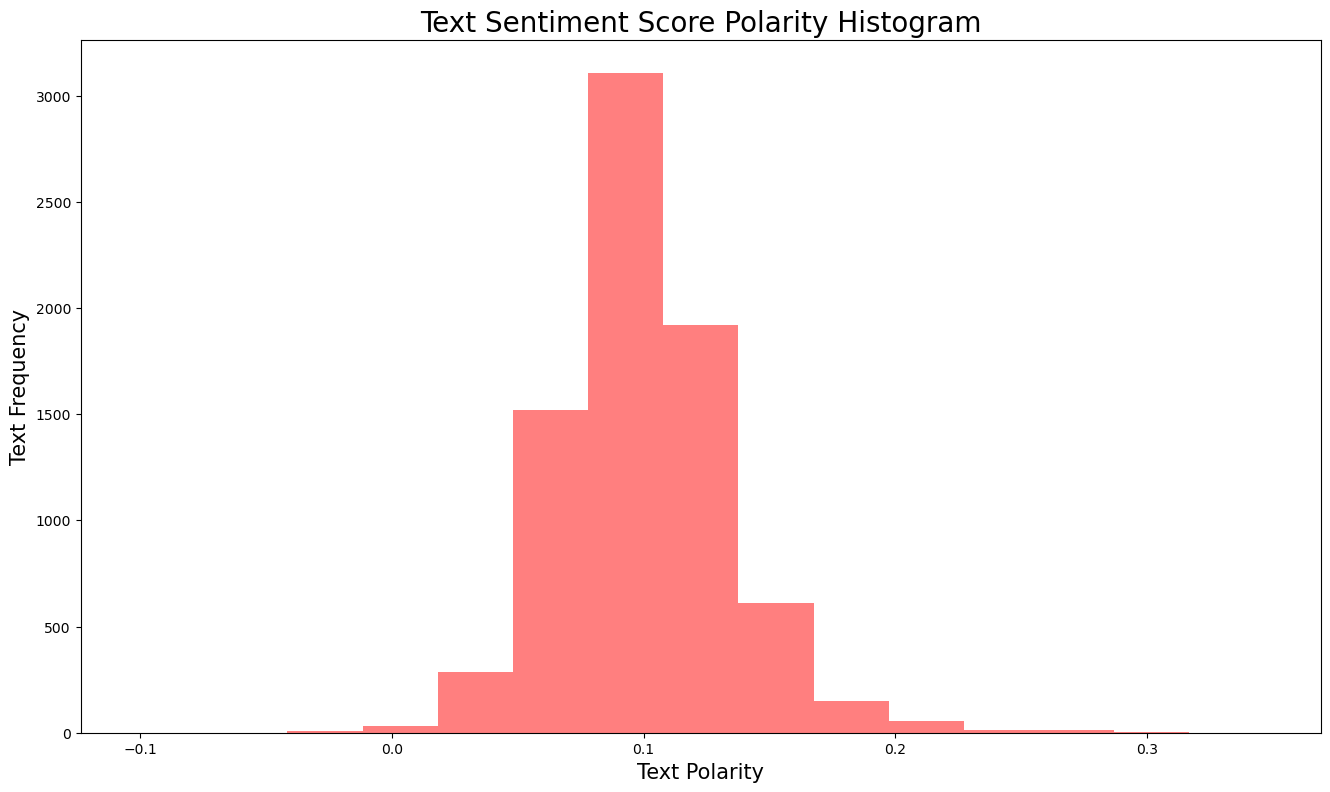

In [55]:
# Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize = (16,9))
plt.hist(speeches_text['text_polarity'], bins=15, alpha=0.5, facecolor='red')

# Set labels 
plt.title('Text Sentiment Score Polarity Histogram', fontsize = 20)
plt.xlabel('Text Polarity', fontsize=15)
plt.ylabel('Text Frequency', fontsize=15)

In [56]:
# Define a function to extract a polarity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [57]:
# Determine subjectivity of text columns. 
speeches_text['text_subjectivity'] = speeches_text['text'].apply(generate_subjectivity)

# View output.
speeches_text.head(10)

,text,text_tokens,text_polarity,text_subjectivity
4960,ladies and gentlemen i am very grateful for th...,"[ladies, and, gentlemen, i, am, very, grateful...",0.094450,0.396869
3254,inflation in the euro area is far too high rea...,"[inflation, in, the, euro, area, is, far, too,...",0.102712,0.459163
3253,i am very pleased to be taking part in this ev...,"[i, am, very, pleased, to, be, taking, part, i...",0.074635,0.374037
3252,the euro area is facing a sequence of unpreced...,"[the, euro, area, is, facing, a, sequence, of,...",0.082558,0.407564
903,good morning and thank you for inviting me to ...,"[good, morning, and, thank, you, for, inviting...",0.126473,0.461812
283,good evening on behalf of the reserve bank boa...,"[good, evening, on, behalf, of, the, reserve, ...",0.130802,0.435109
902,governor of the bank of canada and the economy...,"[governor, of, the, bank, of, canada, and, the...",0.067256,0.416627
3251,notes the standard deviation of monthly percen...,"[notes, the, standard, deviation, of, monthly,...",0.078030,0.249743
901,governor of the bank of canada press conferenc...,"[governor, of, the, bank, of, canada, press, c...",0.069676,0.410357
6169,between them the covid19 pandemic and russias ...,"[between, them, the, covid19, pandemic, and, r...",0.076100,0.388652


Text(0, 0.5, 'Text Frequency')

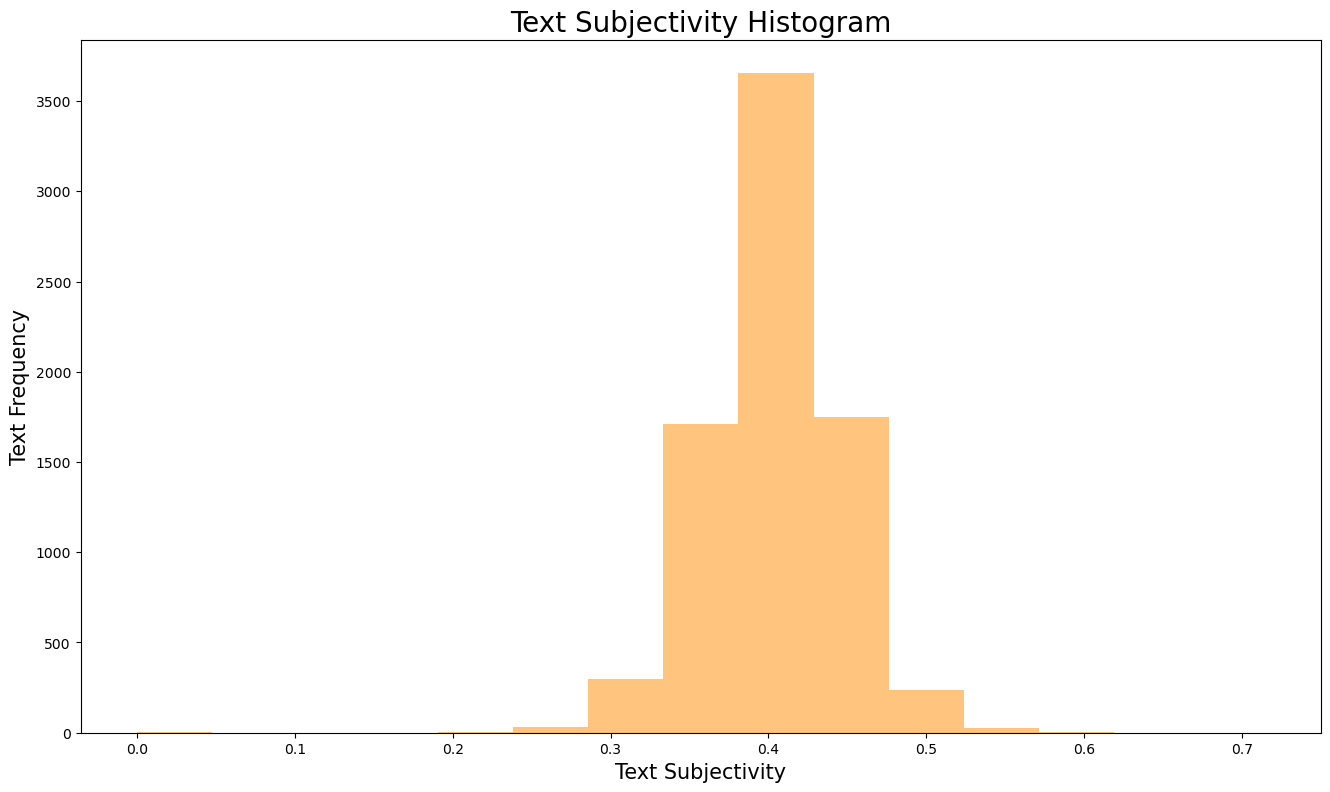

In [58]:
# Histogram of subjectivity
plt.figure(figsize = (16,9))
plt.hist(speeches_text['text_subjectivity'], bins=15, alpha=0.5, facecolor='darkorange')

# Set labels 
plt.title('Text Subjectivity Histogram', fontsize = 20)
plt.xlabel('Text Subjectivity', fontsize=15)
plt.ylabel('Text Frequency', fontsize=15)

## 6. Identify top 20 positive and negative texts

**Top 20 Positive Text:**

In [59]:
# Top 20 positive reviews.
top_positive_text = speeches_text.nlargest(20, 'text_polarity')

# View output.
print("\nTop 20 Positive Text:")
top_positive_text[['text', 'text_polarity']]


Top 20 Positive Text:


,text,text_polarity
5980,at the most senior levels in the organisation ...,0.346667
5029,call me a masochist if you like but i actually...,0.307699
6781,the federal reserve the central bank of the un...,0.295009
775,governor of the bank of canada it is the bank ...,0.288651
7469,good afternoon thank you senator reed for the ...,0.286229
5529,good morning everyone i am delighted to welcom...,0.282180
606,governor of the bank of canada official ceremo...,0.273994
398,good morning everyone and welcome welcome also...,0.272352
6691,good morning i appreciate the opportunity to p...,0.270731
7710,for release on delivery by at the good morning...,0.269531


**Top 20 Negative Text:**

In [60]:
# Top 20 negative reviews.
top_negative_text = speeches_text.nsmallest(20, 'text_polarity')

# View output.
print("\nTop 20 Negative Text:")
top_negative_text[['text', 'text_polarity']]


Top 20 Negative Text:


,text,text_polarity
3134,note hicpx refers to hicp excluding energy and...,-0.101250
3126,note data for ireland not included due to data...,-0.035000
7363,i would like briefly to describe the legal fra...,-0.029791
3171,note word cloud is based on the responses to t...,-0.028385
3321,click on 91kb to download the full text any te...,-0.024950
4836,ladies and gentlemen thank you for accepting o...,-0.021162
1880,it is a pleasure to be here among you and to s...,-0.019444
3727,statement by haruhiko kuroda governor of the b...,-0.017551
444,today we released the april mpr which discusse...,-0.013690
3728,today i am very pleased to appear before the v...,-0.008744


# Sentiment analysis based on countries

In [61]:
# View dataframe
speeches.head()

,reference,location,date,title,author,is_gov,text
4960,r221110a_SNB,EU,2022-11-10,current challenges to central banks' independence,jordan,1,ladies and gentlemen i am very grateful for th...
3254,r221104a_ECB,EU,2022-11-04,monetary policy in a high inflation environmen...,lagarde,1,inflation in the euro area is far too high rea...
3253,r221104b_ECB,EU,2022-11-04,the euro area economy and the energy transition,guindos,0,i am very pleased to be taking part in this ev...
3252,r221103a_ECB,EU,2022-11-03,mind the step: calibrating monetary policy in ...,panetta,0,the euro area is facing a sequence of unpreced...
903,r221102a_BOC,CAN,2022-11-02,preparing for payments supervision,morrow,0,good morning and thank you for inviting me to ...


In [62]:
# Add sentiment scores to original dataframe
speeches['text_polarity'] = speeches_text['text_polarity']

# Drop unnecessary columns
speeches = speeches.drop(columns = ['reference', 'title','is_gov'])

# View changes
speeches

,location,date,author,text,text_polarity
4960,EU,2022-11-10,jordan,ladies and gentlemen i am very grateful for th...,0.094450
3254,EU,2022-11-04,lagarde,inflation in the euro area is far too high rea...,0.102712
3253,EU,2022-11-04,guindos,i am very pleased to be taking part in this ev...,0.074635
3252,EU,2022-11-03,panetta,the euro area is facing a sequence of unpreced...,0.082558
903,CAN,2022-11-02,morrow,good morning and thank you for inviting me to ...,0.126473
...,...,...,...,...,...
4,AUS,1992-08-17,fraser,as a longtime fan of don sanders i am delighte...,0.102694
3,AUS,1992-05-29,fraser,it is a pleasure to have this opportunity to a...,0.092684
2,AUS,1992-03-14,fraser,i welcome this opportunity to talk about prosp...,0.112064
1,AUS,1991-10-03,fraser,today i wish to talk about real interest rates...,0.116070


In [64]:
# Group data by date, author and country
grouped_speeches = speeches.groupby(['date', 'author', 'location']).agg({'text_polarity': 'mean'})

# Reset index
grouped_speeches = grouped_speeches.reset_index()

In [65]:
# View datatypes
print(grouped_speeches.dtypes)

date              object
author            object
location          object
text_polarity    float64
dtype: object


In [66]:
# Convert the 'date' column to datetime data type
grouped_speeches['date'] = pd.to_datetime(grouped_speeches['date'])

In [67]:
# View datatypes
print(grouped_speeches.dtypes)

date             datetime64[ns]
author                   object
location                 object
text_polarity           float64
dtype: object


In [68]:
# Create a new column containing only the year
grouped_speeches['Year'] = grouped_speeches['date'].dt.year

In [69]:
# View changes
grouped_speeches.head()

,date,author,location,text_polarity,Year
0,1990-11-28,fraser,AUS,0.075621,1990
1,1991-10-03,fraser,AUS,0.116070,1991
2,1992-03-14,fraser,AUS,0.112064,1992
3,1992-05-29,fraser,AUS,0.092684,1992
4,1992-08-17,fraser,AUS,0.102694,1992


**Create a lineplot to show sentiment analysis for Each country over-time**

In [70]:
# View all countries
grouped_speeches['location'].unique()

array(['AUS', 'EU', 'US', 'JPN', 'CAN', 'UK'], dtype=object)

In [71]:
# Import matplotlib
import matplotlib.pyplot as plt

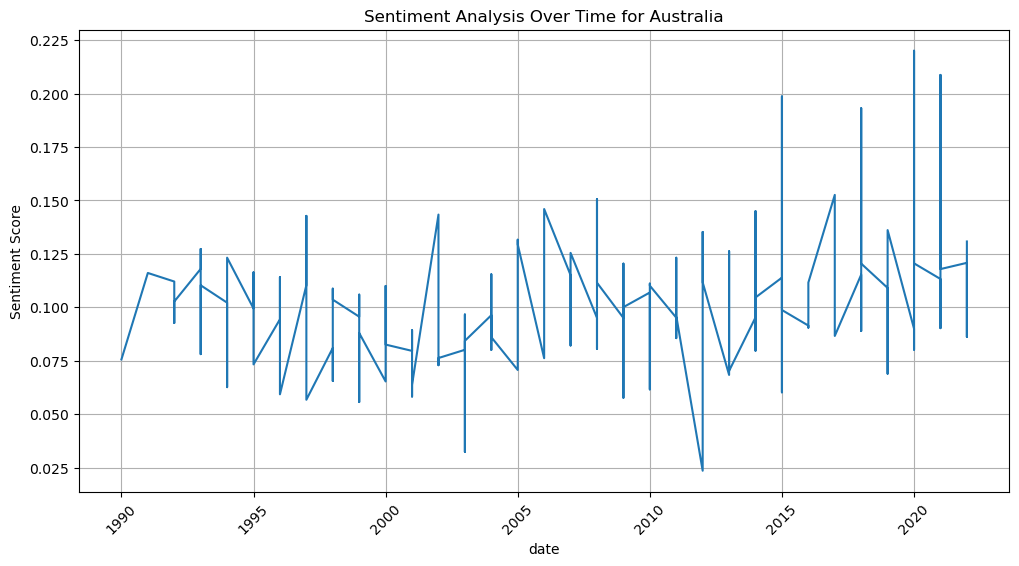

In [74]:
# Filter data for a specific country
australia = grouped_speeches[grouped_speeches['location'] == 'AUS']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(australia['Year'], australia['text_polarity'])
plt.title('Sentiment Analysis Over Time for Australia')
plt.xlabel('date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

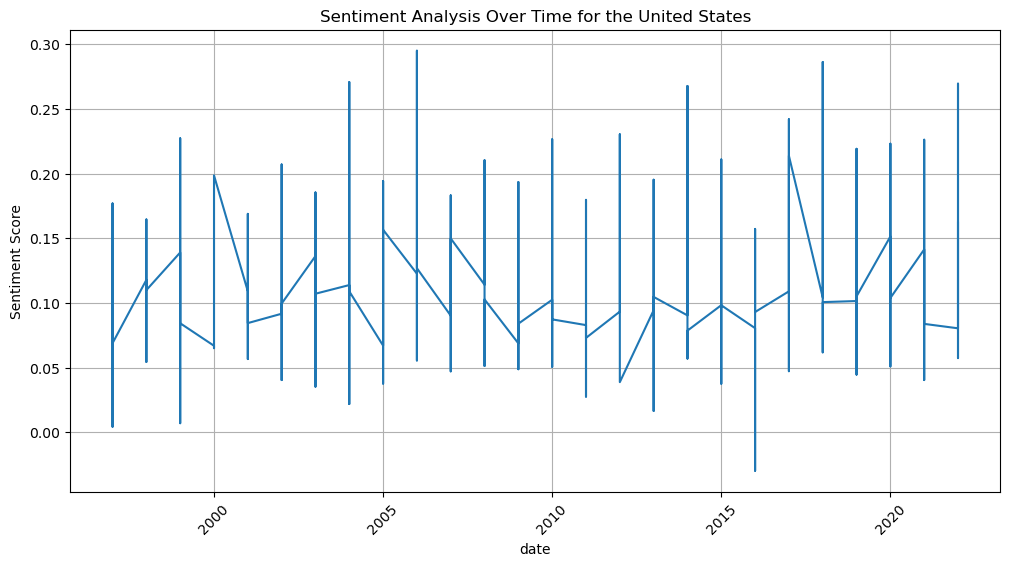

In [75]:
# Filter data for a specific country
us = grouped_speeches[grouped_speeches['location'] == 'US']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(us['Year'], us['text_polarity'])
plt.title('Sentiment Analysis Over Time for the United States')
plt.xlabel('date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

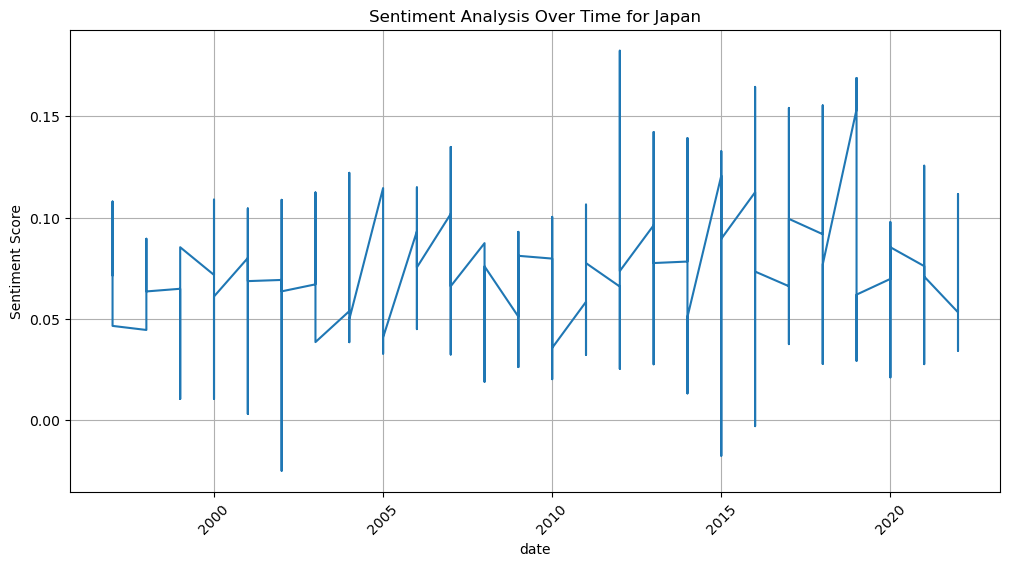

In [76]:
# Filter data for a specific country
japan = grouped_speeches[grouped_speeches['location'] == 'JPN']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(japan['Year'], japan['text_polarity'])
plt.title('Sentiment Analysis Over Time for Japan')
plt.xlabel('date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

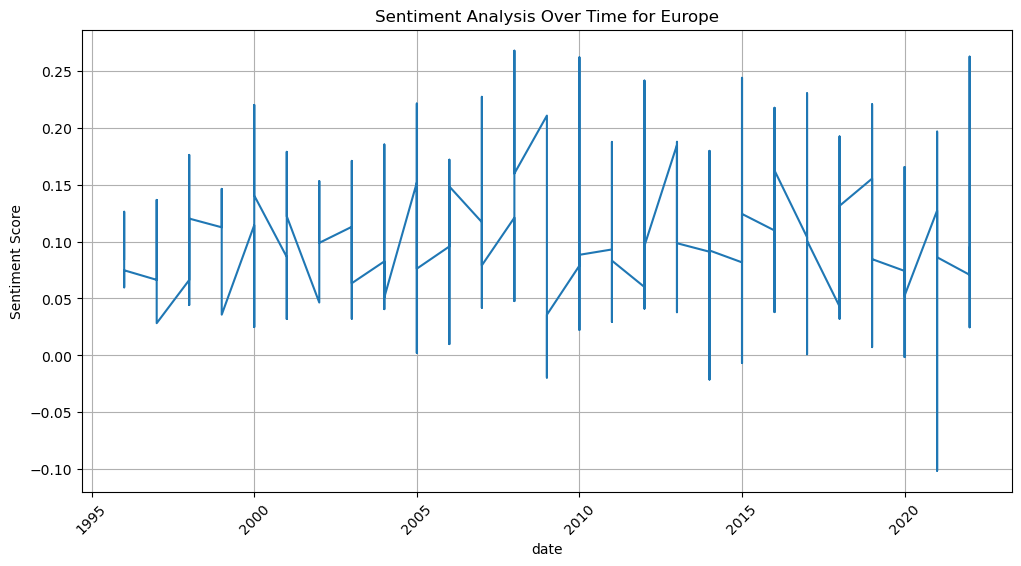

In [77]:
# Filter data for a specific country
euro = grouped_speeches[grouped_speeches['location'] == 'EU']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(euro['Year'], euro['text_polarity'])
plt.title('Sentiment Analysis Over Time for Europe')
plt.xlabel('date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

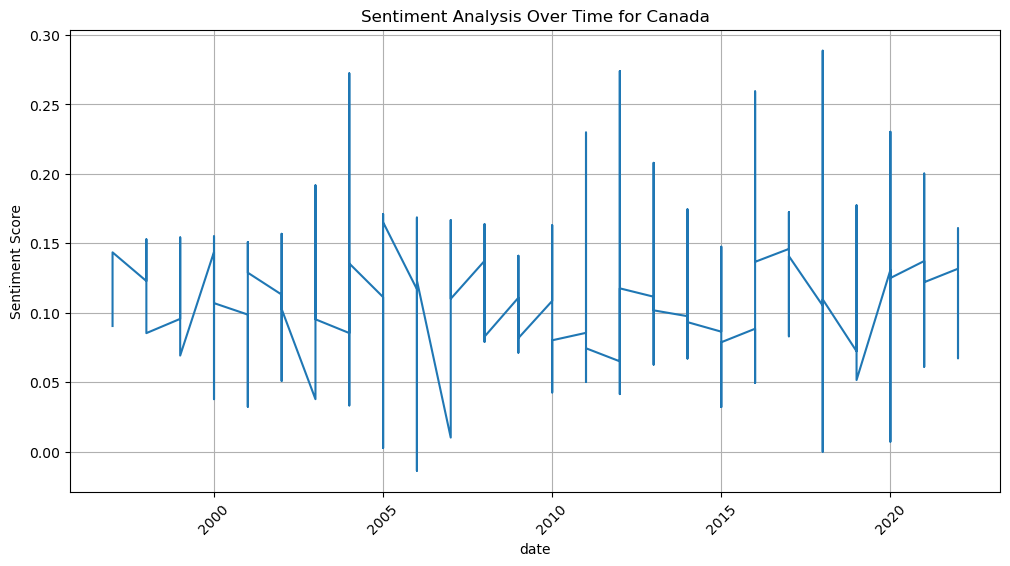

In [78]:
# Filter data for a specific country
canada = grouped_speeches[grouped_speeches['location'] == 'CAN']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(canada['Year'], canada['text_polarity'])
plt.title('Sentiment Analysis Over Time for Canada')
plt.xlabel('date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

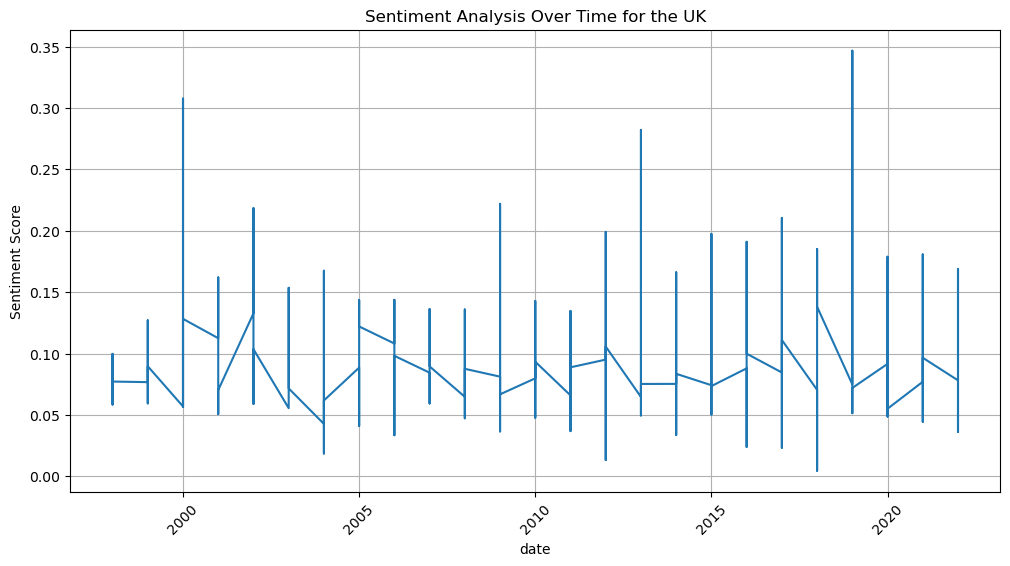

In [79]:
# Filter data for a specific country
uk = grouped_speeches[grouped_speeches['location'] == 'UK']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(uk['Year'], uk['text_polarity'])
plt.title('Sentiment Analysis Over Time for the UK')
plt.xlabel('date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

In [80]:
grouped_speeches['author'].unique()

array(['fraser', 'NO_INFO', 'macfarlane', 'meyer', 'greenspan',
       'backstrom', 'phillips', 'heikensten', 'kelley', 'matsushita',
       'lamfalussy', 'ingves', 'rivlin', 'thiessen', 'duisenberg',
       'no_info', 'governor', 'vienna', 'london', 'tokyo', 'kong',
       'gramlich', 'ferguson', 'fuglister', 'gehrig', 'haeberli',
       'sporndli', 'bonin', 'roth', 'taketomi', 'bank', 'crises',
       'hayami', 'schioppa', 'george', 'rich', 'king', 'hamalainen',
       'budd', 'vickers', 'main', 'noyer', 'buiter', 'hessius', 'capital',
       'committee', 'julius', 'solans', 'francisco', 'istanbul',
       'fujiwara', 'clementi', 'issing', 'yamaguchi', 'ueda', 'brealey',
       'hoogduin', 'wadhwani', 'bankwashington', 'eu', 'goodhart',
       'nyberg', 'nakahara', 'bergstrom', 'shinotsuka', 'environment',
       'srejber', 'clark', 'allen', 'plenderleith', 'nickell', 'emu',
       'efma', 'brussels', 'dodge', 'policy', 'smout', 'blattner',
       'allsopp', 'forum', 'barker', 'perss

# Analysis Using Custom Threshold Values for Polarity

In [81]:
from textblob import TextBlob

# Example list of words
word_list = ["positive", "negative", "neutral", "amazing", "terrible", "average"]

# Set your custom threshold
custom_threshold = 0.2

for word in word_list:
    blob = TextBlob(word)
    word_polarity = blob.sentiment.polarity

    if word_polarity > custom_threshold:
        sentiment = 'Positive'
    elif word_polarity < -custom_threshold:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    print(f'{word}: Polarity = {word_polarity}, Sentiment = {sentiment}')

positive: Polarity = 0.22727272727272727, Sentiment = Positive
negative: Polarity = -0.3, Sentiment = Negative
neutral: Polarity = 0.0, Sentiment = Neutral
amazing: Polarity = 0.6000000000000001, Sentiment = Positive
terrible: Polarity = -1.0, Sentiment = Negative
average: Polarity = -0.15, Sentiment = Neutral


In [82]:
speeches.head()

,location,date,author,text,text_polarity
4960,EU,2022-11-10,jordan,ladies and gentlemen i am very grateful for th...,0.094450
3254,EU,2022-11-04,lagarde,inflation in the euro area is far too high rea...,0.102712
3253,EU,2022-11-04,guindos,i am very pleased to be taking part in this ev...,0.074635
3252,EU,2022-11-03,panetta,the euro area is facing a sequence of unpreced...,0.082558
903,CAN,2022-11-02,morrow,good morning and thank you for inviting me to ...,0.126473


In [83]:
# Define a function to assign sentiment based on the custom threshold
def assign_sentiment(text):
    blob = TextBlob(text)
    word_polarity = blob.sentiment.polarity
    if word_polarity > custom_threshold:
        return 'Positive'
    elif word_polarity < -custom_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'Text' column and create a new 'Sentiment' column
speeches['Sentiment'] = speeches['text'].apply(assign_sentiment)

# Display the updated DataFrame
print(speeches)

     location        date   author  \
4960       EU  2022-11-10   jordan   
3254       EU  2022-11-04  lagarde   
3253       EU  2022-11-04  guindos   
3252       EU  2022-11-03  panetta   
903       CAN  2022-11-02   morrow   
...       ...         ...      ...   
4         AUS  1992-08-17   fraser   
3         AUS  1992-05-29   fraser   
2         AUS  1992-03-14   fraser   
1         AUS  1991-10-03   fraser   
0         AUS  1990-11-28   fraser   

                                                   text  text_polarity  \
4960  ladies and gentlemen i am very grateful for th...       0.094450   
3254  inflation in the euro area is far too high rea...       0.102712   
3253  i am very pleased to be taking part in this ev...       0.074635   
3252  the euro area is facing a sequence of unpreced...       0.082558   
903   good morning and thank you for inviting me to ...       0.126473   
...                                                 ...            ...   
4     as a longtime fan o

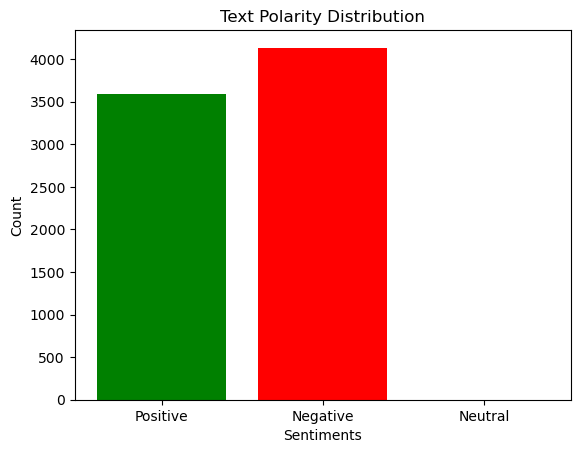

In [84]:
import matplotlib.pyplot as plt



# Calculate the count of positive, negative, and neutral texts based on your threshold
positive_count = len(speeches[speeches['text_polarity'] > 0.1])
negative_count = len(speeches[speeches['text_polarity'] < 0.1])
neutral_count = len(speeches[speeches['text_polarity'] == 0.1])

# Create a bar chart
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart
plt.show()

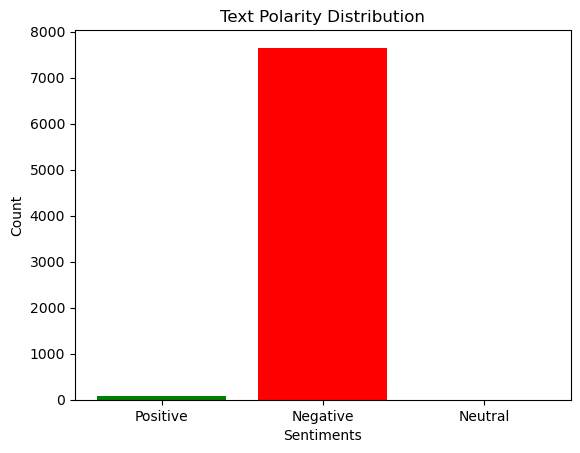

In [85]:
import matplotlib.pyplot as plt



# Calculate the count of positive, negative, and neutral texts based on your threshold
positive_count = len(speeches[speeches['text_polarity'] > 0.2])
negative_count = len(speeches[speeches['text_polarity'] < 0.2])
neutral_count = len(speeches[speeches['text_polarity'] == 0.2])

# Create a bar chart
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart
plt.show()

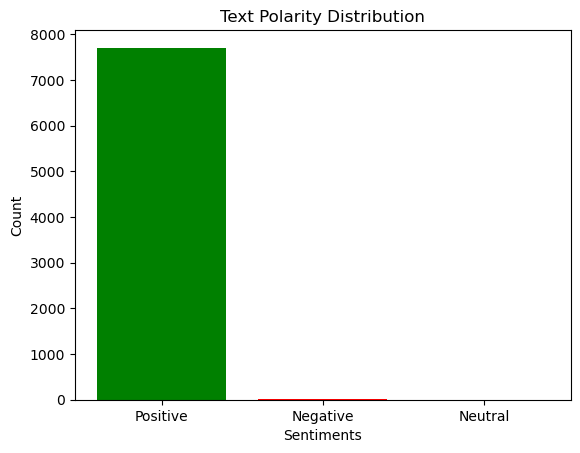

In [86]:
import matplotlib.pyplot as plt



# Calculate the count of positive, negative, and neutral texts based on your threshold
positive_count = len(speeches[speeches['text_polarity'] > 0.0])
negative_count = len(speeches[speeches['text_polarity'] < 0.0])
neutral_count = len(speeches[speeches['text_polarity'] == 0.0])

# Create a bar chart
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart
plt.show()

# Anaysis using Time Series Method

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
# Read in data
df = pd.read_csv('all_speeches.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(7721, 7)
(500, 7)


In [89]:
df['date'] = pd.to_datetime(df['date'])

In [90]:
df = df.sort_values('date')

In [91]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Apply the sentiment analysis function to the 'Text' column and create a new column 'SentimentScore'
df['SentimentScore'] = df['text'].apply(analyze_sentiment)

In [92]:
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment categorization function to create a new column 'Sentiment'
df['Sentiment'] = df['SentimentScore'].apply(categorize_sentiment)

In [93]:
print(df)

        reference    country       date  \
0    r901128a_BOA  australia 1990-11-28   
1    r911003a_BOA  australia 1991-10-03   
2    r920314a_BOA  australia 1992-03-14   
3    r920529a_BOA  australia 1992-05-29   
4    r920817a_BOA  australia 1992-08-17   
..            ...        ...        ...   
279  r220309a_BOA  australia 2022-03-09   
280  r220621a_BOA  australia 2022-06-21   
281  r220908a_BOA  australia 2022-09-08   
282  r220916a_BOA  australia 2022-09-16   
283  r221101a_BOA  australia 2022-11-01   

                                                 title  author  is_gov  \
0                    A Proper Role for Monetary Policy  fraser       0   
1                                                       fraser       0   
2                                                       fraser       0   
3                                                       fraser       0   
4                                                       fraser       0   
..                                     

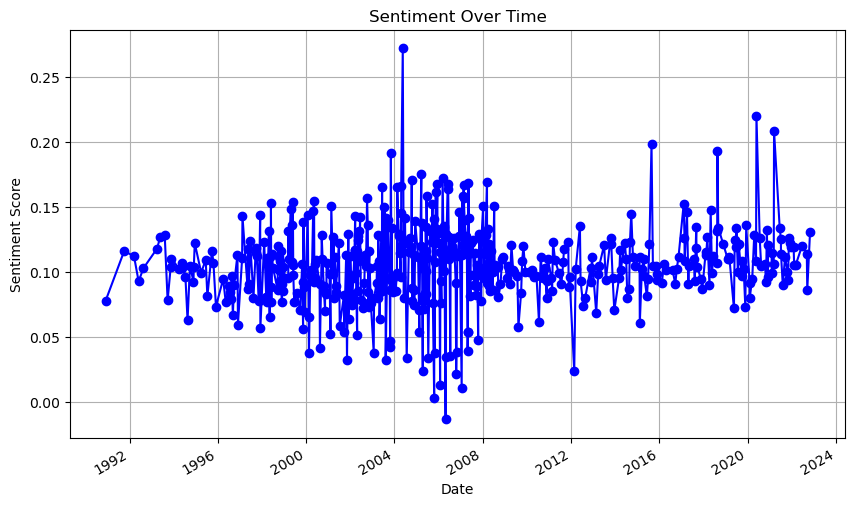

In [94]:
plt.figure(figsize=(10, 6))

plt.plot(df['date'], df['SentimentScore'], marker='o', linestyle='-', color='b', label='Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.grid(True)

# Format x-axis as needed (e.g., date formatting)
plt.gcf().autofmt_xdate()
plt.show()

# Correlation Analysis

In [95]:
correlation = df['SentimentScore'].corr(speeches['text_polarity'])
print(f"Correlation analysis: {correlation}")

Correlation analysis: 0.9977611564014733
